## Face Emotion Test using an Image

### Happy Face Image Test

In [3]:
from PIL import Image
import torch
import torch.nn as nn
from torchvision import transforms, models

# Config
img_path = "happyboy.jpg"   # your test image
num_classes = 7
save_path = "Final_ModelV2.pth"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Transform
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load model
model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(save_path, map_location=device))
model = model.to(device)
model.eval()

# Load image
img = Image.open(img_path).convert("RGB")
img = transform(img).unsqueeze(0).to(device)

# Predict
emotions = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Neutral", 5:"Sad", 6:"Surprised"}
with torch.no_grad():
    outputs = model(img)
    _, predicted = torch.max(outputs, 1)
    print("Predicted emotion:", emotions[predicted.item()])


cuda
Predicted emotion: Angry


### Sad Face Image Test

In [5]:
from PIL import Image
import torch
import torch.nn as nn
from torchvision import transforms, models

# --- Config ---
img_path = "happyboy.jpg"   # your test image
num_classes = 7
save_path = "Final_ModelV2.pth"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Transform ---
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# --- Model ---
# Use weights=None → avoids pretrained deprecation warning
model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(save_path, map_location=device))
model = model.to(device)
model.eval()

# --- Load image ---
img = Image.open(img_path).convert("RGB")
img = transform(img).unsqueeze(0).to(device)

# --- Predict ---
emotions = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Neutral", 5:"Sad", 6:"Surprised"}
with torch.no_grad():
    outputs = model(img)
    _, predicted = torch.max(outputs, 1)
    print("Predicted emotion:", emotions[predicted.item()])


Predicted emotion: Angry


## Face Emotion Test using Test Data

In [5]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
import os

# --- Config ---
data_dir = r"C:\Users\HWA\Desktop\AI Project UV"
batch_size = 64
num_classes = 7
save_path = "Final_ModelV2.pth"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# --- Transforms ---
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# --- Dataset & Loader ---
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# --- Model ---
# Use weights=None to avoid the deprecation warning
model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(save_path, map_location=device))
model = model.to(device)
model.eval()

# --- Evaluation ---
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

acc = 100 * correct / total
print(f"Test Accuracy: {acc:.2f}%")


cuda
Test Accuracy: 65.35%


## Model Accuracy for each Emotion with Confusion Matrix

Using device: cuda
Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

 Test Accuracy: 65.35%

 Per-Class Accuracy:
angry          : 58.66%
disgust        : 52.25%
fear           : 41.41%
happy          : 86.58%
neutral        : 61.15%
sad            : 56.86%
surprise       : 77.98%


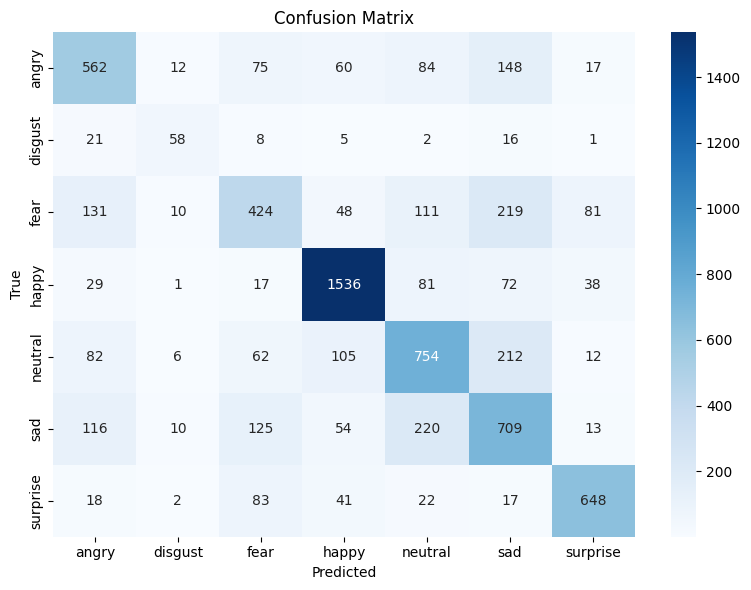

In [7]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# --- Config ---
data_dir = r"C:\Users\HWA\Desktop\AI Project UV"
batch_size = 64
num_classes = 7
save_path = "Final_ModelV2.pth"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- Transforms ---
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# --- Dataset & Loader ---
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class_names = test_dataset.classes
print("Classes:", class_names)

# --- Model ---
model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(save_path, map_location=device))
model = model.to(device)
model.eval()

# --- Evaluation ---
correct, total = 0, 0
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

acc = 100 * correct / total
print(f"\n Test Accuracy: {acc:.2f}%")

# --- Per-Class Accuracy ---
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

print("\n Per-Class Accuracy:")
for i, cls in enumerate(class_names):
    cls_mask = (all_labels == i)
    cls_total = np.sum(cls_mask)
    cls_correct = np.sum(all_preds[cls_mask] == i)
    acc_cls = 100 * cls_correct / cls_total if cls_total > 0 else 0
    print(f"{cls:15s}: {acc_cls:.2f}%")

# --- Confusion Matrix ---
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()